### Importamos librería pandas

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns

### El paper contempla un Dataset con diferentes secuencias, de estas solo seleccionamos aquellas que sabemos que su actividad es antifungal.

### Importamos el Dataset, lo convertimos a Dataframe y visualizamos cuantas filas y columnas posee.

In [ ]:
url_bioped = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/d2045667f0dfd296ed0139d276a1cb50dc1cab78/Base%20de%20datos/BIOPEP-UWM/biopep-umw.xlsx"

df_bioped = pd.read_excel(url_bioped)
df_bioped.to_csv("biopep-umw.csv", index=False)

df_bioped.head()

,ID,Name,Sequence,Chem. mass,Monois. mass,Activity,InChlKey
0,2566,regulating cell-permeability peptide,NYKKPKL,890.0780,889.5369,regulating,RQFNGWRPSKHMKK-NXBWRCJVSA-N
1,2567,regulating cell-permeability peptide,NYKKPKLAAAPALLALLVAPLLAVAA,2601.2117,2599.6143,regulating,SLFAVMFXXFBIEI-PHOGLEJUSA-N
2,2568,regulating cell-permeability peptide,AAVALLPAVLLALLAPAAANYKKPKL,2601.2117,2599.6143,regulating,SCGYKWYBPYHFEB-PHOGLEJUSA-N
3,2569,regulating cell-permeability peptide,NYKKPKLAAAAAVALLPAVLLALLAP,2601.2117,2599.6143,regulating,FCRVOEOQSNIOPS-PHOGLEJUSA-N
4,2570,VV-hemorphin-7,VVYPWTQRF,1195.3651,1194.6167,opioid,FFBBHLKDMHCFTH-AKYHLAPZSA-N


In [ ]:
df_bioped.shape

(5360, 7)

### Filtramos solo las columnas de interés (Sequence y Activity)

In [ ]:
df_bioped_filter = df_bioped[["Sequence", "Activity"]]
df_bioped_filter.head()

,Sequence,Activity
0,NYKKPKL,regulating
1,NYKKPKLAAAPALLALLVAPLLAVAA,regulating
2,AAVALLPAVLLALLAPAAANYKKPKL,regulating
3,NYKKPKLAAAAAVALLPAVLLALLAP,regulating
4,VVYPWTQRF,opioid


In [ ]:
df_bioped["Activity"].value_counts()

,count
Activity,
ACE inhibitor,1199
antioxidative,951
antibacterial,528
dipeptidyl peptidase IV inhibitor,506
celiac toxic,243
...,...
thymidylate synthase inhibitor,1
peptidylprolyl isomerase isnhibitor,1
Inhibitor of endothelin-1 release,1


### Filtramos solo aquellas secuencias que presentan la actividad

In [ ]:
df_bioped_filter_antifungal = df_bioped_filter[df_bioped_filter['Activity'].str.contains("Antifungal", case=False, na=False)].copy()
df_bioped_filter_antifungal.head()

,Sequence,Activity
1257,FLSFPTTKTYFPHFDLSHGSAQVKGHGAK,antifungal
1434,FKCRRWQWRW,antifungal
2041,GWGSFFKKAAHVGKHVGKAALTHYL~,antifungal
2042,GWGSFFKKAAHVGKHVGKAALTHYLG,antifungal
2045,RWRSFFKKAAHRGKHVGKRARTHYL~,antifungal


In [ ]:
df_bioped_filter_antifungal.shape

(63, 2)

### ***Dataset de Actividades no antinfungicas para guardar***

In [ ]:
df_bioped_filter_no_antifungal = df_bioped_filter[~df_bioped_filter['Activity'].str.contains("Antifungal", case=False, na=False)].copy()
df_bioped_filter_no_antifungal.head()

,Sequence,Activity
0,NYKKPKL,regulating
1,NYKKPKLAAAPALLALLVAPLLAVAA,regulating
2,AAVALLPAVLLALLAPAAANYKKPKL,regulating
3,NYKKPKLAAAAAVALLPAVLLALLAP,regulating
4,VVYPWTQRF,opioid


### Creamos una nueva columna llamada label y como todas presentan la actividad le podremos 1.

In [ ]:
df_bioped_filter_antifungal['label'] = 1
df_bioped_filter_antifungal.head()

,Sequence,Activity,label
1257,FLSFPTTKTYFPHFDLSHGSAQVKGHGAK,antifungal,1
1434,FKCRRWQWRW,antifungal,1
2041,GWGSFFKKAAHVGKHVGKAALTHYL~,antifungal,1
2042,GWGSFFKKAAHVGKHVGKAALTHYLG,antifungal,1
2045,RWRSFFKKAAHRGKHVGKRARTHYL~,antifungal,1


### Filtramos solo la columnas Sequence y label

### ***Dataset de positivos***

In [ ]:
df_BIOPEP_UWM = df_bioped_filter_antifungal[["Sequence", "label"]]
df_BIOPEP_UWM.head()

,Sequence,label
1257,FLSFPTTKTYFPHFDLSHGSAQVKGHGAK,1
1434,FKCRRWQWRW,1
2041,GWGSFFKKAAHVGKHVGKAALTHYL~,1
2042,GWGSFFKKAAHVGKHVGKAALTHYLG,1
2045,RWRSFFKKAAHRGKHVGKRARTHYL~,1


In [ ]:
df_BIOPEP_UWM.shape

(63, 2)

#Limpieza del DataFrame
###Verificación del Duplicado

In [ ]:
df = df_BIOPEP_UWM

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df[
    df.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"✅ Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'Activity']].head(20))
else:
    print("🎉 ¡No se encontraron secuencias duplicadas en tu DataFrame!")

🎉 ¡No se encontraron secuencias duplicadas en tu DataFrame!


### Verificación de secuencias no canónicas

In [ ]:
df_BIOPEP_UWM["Sequence"] = df_BIOPEP_UWM["Sequence"].str.rstrip().copy() #eliminamos los posibles espacios en la secuencia

/tmp/ipython-input-3673037526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BIOPEP_UWM["Sequence"] = df_BIOPEP_UWM["Sequence"].str.rstrip().copy() #eliminamos los posibles espacios en la secuencia


In [ ]:
valid_mask = df_BIOPEP_UWM["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_BIOPEP_UWM[~valid_mask].copy()
invalid_df

,Sequence,label
2041,GWGSFFKKAAHVGKHVGKAALTHYL~,1
2045,RWRSFFKKAAHRGKHVGKRARTHYL~,1
2049,SWSSFFKKAAHSGKHVGKSASTHYL~,1
3532,WKLFKKILKVL~,1
3555,YKLFKKILKVL~,1
3556,FKLFKKILKVL~,1
3558,KKLFKKILKVL~,1
3560,KKLFKKILKKL~,1
3561,WKLFKKILKKL~,1
3563,WKLFKKILKWL~,1


In [ ]:
invalid_df.shape

(14, 2)

In [ ]:
# Mantener solo secuencias canónicas
filtered = df_BIOPEP_UWM[valid_mask].copy()

In [ ]:
filtered.head()

,Sequence,label
1257,FLSFPTTKTYFPHFDLSHGSAQVKGHGAK,1
1434,FKCRRWQWRW,1
2042,GWGSFFKKAAHVGKHVGKAALTHYLG,1
2046,RWRSFFKKAAHRGKHVGKRARTHYLG,1
2050,SWSSFFKKAAHSGKHVGKSASTHYLG,1


In [ ]:
filtered.shape

(49, 2)

In [ ]:
df_BIOPEP_UWM_pos = filtered

### Longitud de las secuencias

In [ ]:
df_BIOPEP_UWM_pos = df_BIOPEP_UWM_pos.copy()  # opcional pero limpio
df_BIOPEP_UWM_pos["Largo"] = df_BIOPEP_UWM_pos["Sequence"].str.len()
df_BIOPEP_UWM_pos["Largo"].describe()

,Largo
count,49.000000
mean,13.897959
std,5.455291
min,5.000000
25%,11.000000
50%,12.000000
75%,16.000000
max,29.000000


<Axes: xlabel='Largo', ylabel='Count'>

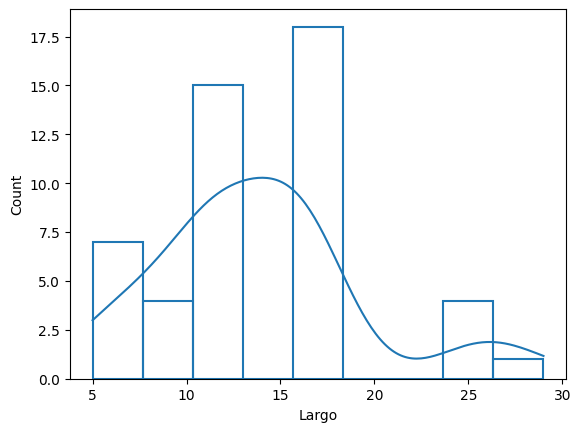

In [ ]:
sns.histplot(data=df_BIOPEP_UWM_pos, x="Largo", fill=False, kde=True)

# Descargar el Dataset

In [ ]:
dataframe_a_descargar = df_BIOPEP_UWM_pos
dataframe_a_descargar.to_csv(
    'BIOPEP_UWMl_antifungal_pos.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('BIOPEP_UWMl_antifungal_pos.csv')